# Метод частичной дискретизации с условиями излучения

$$\begin{cases}
u_{xx}+u_{yy}+\varkappa^2 \rho(x,y)\ u=f(x,y),\quad (x,y)\in(0,a)\times(0,b), \\
u(x,0)=u(x,b)=0, \\
f(x,y) \equiv 0,\quad \text{при}\ x\not\in [0,a].
\end{cases}$$

In [831]:
"""
A, B, C - вектор матриц, F - массив векторов. \n
Если, например, А - матрица, считаем, что предполагается вектор одинаковых матриц. \n
Если и A, и B, и С, и F - не векторы, длина вектора решения указывается через аргумент len.
"""
function matrix_thomas(A, B, C, F; typ=Float64, len=1, F_left=nothing)
    v = filter(a->!(eltype(a) <: Number),[A,B,C,F])
    N = len == 1 ? length(v[1]) : len
    K = len == 1 ? size(v[1][1],1) : size(A,1)
    a = zeros(typ,K,K,N+1)
    b = zeros(typ,K,N+1)

    inside(a,b) = true in map(el->isequal(el,a),b)
    
    An = inside(A,v) ? n->A[n] : n->A
    Bn = inside(B,v) ? n->B[n] : n->B
    Cn = inside(C,v) ? n->C[n] : n->C
    Fn = inside(F,v) ? n->F[n] : n->F

    for n = 1:N
        a[:,:,n+1] = -Cn(n) / (An(n)*a[:,:,n] + Bn(n))
        b[:,n+1] = (Fn(n) - An(n)*b[:,n])' / (An(n)*a[:,:,n] + Bn(n))
        println("direct, step: $n")
    end

    x = zeros(typ,K,N+1)
    for n = N:-1:1
        x[:,n] = a[:,:,n+1]*x[:,n+1] + b[:,n+1]
        println("reverse, step: $n")
    end

    return x[:,1:N]
end

matrix_thomas

In [507]:
a, b = 2, 1
k = 26.5 #12
a1, a2 = 0.5, 1.5
r1, r2 = 1, 3 #1.8

K = 100
N_ = 200
h = a/(N_-1)
x = range(0,stop=a,length=N_)
y = range(0,stop=b,length=K)

mu(k) = pi*k/b
f(y,k) = sqrt(2/b)*sin(pi*k/b*y)

f (generic function with 2 methods)

In [9]:
f(x) = 0.2*(x-a1)/(a2-a1)
g(x) = x <= a1 ? 0 : x <= a2 ? f(x) : 0.2

f1 = x -> b/2-0.1 - g(x)
f2 = x -> b/2 - g(x)
f3 = x -> b/2 + g(x)
f4 = x -> b/2+0.1 + g(x)

#31 (generic function with 1 method)

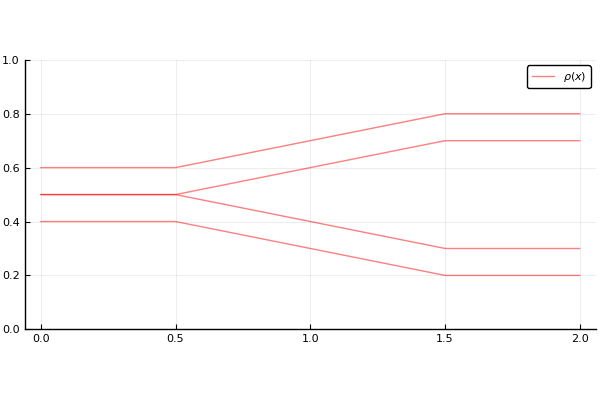

In [360]:
using LaTeXStrings
using Plots
pyplot(fmt="png")

plot( x, f1.(x), c=:red, alpha=0.5, ylim=(0,b), aspect_ratio=1, label=L"\rho(x)")
plot!(x, f2.(x), c=:red, alpha=0.5, label="")
plot!(x, f3.(x), c=:red, alpha=0.5, label="")
plot!(x, f4.(x), c=:red, alpha=0.5, label="")

In [11]:
using LinearAlgebra
using SymPy

y1 = Sym("y")
k1,k2 = symbols("k_1 k_2", positive=true, integer=true)
ff = simplify(integrate( 2/Sym(b)*sin(pi*k1/Sym(b)*y1)*sin(pi*k2/Sym(b)*y1), y1 ))

⎧2⋅(-k₁⋅sin(π⋅k₂⋅y)⋅cos(π⋅k₁⋅y) + k₂⋅sin(π⋅k₁⋅y)⋅cos(π⋅k₂⋅y))             
⎪────────────────────────────────────────────────────────────  for k₁ ≠ k₂
⎪                         ⎛  2     2⎞                                     
⎪                       π⋅⎝k₁  - k₂ ⎠                                     
⎪                                                                         
⎨                            sin(2⋅π⋅k₂⋅y)                                
⎪                   π⋅k₂⋅y - ─────────────                                
⎪                                  2                                      
⎪                   ──────────────────────                      otherwise 
⎪                            π⋅k₂                                         
⎩                                                                         

\begin{equation*} \int\limits_0^b\varphi_{k_1}(y)\rho(x_n,y)\varphi_{k_2}(y)dy = 
   \begin{cases}
   I_1,\ x_n\in (0,a_1), \\
   I_2,\ x_n\in [a_1,a_2], \\
   I_3,\ x_n\in (a_2,a).
   \end{cases}
\end{equation*}
$I_1 = \rho_1\delta_{k_1,k_2} + (\rho_2-\rho_1)\int\limits_{\frac{b}{2}-0.1}^{\frac{b}{2}+0.1}
\varphi_{k_1}\varphi_{k_2}dy,$  
$I_2 = \rho_1\delta_{k_1,k_2} + (\rho_2-\rho_1)\int\limits_{\frac{b}{2}-0.1-f(x_n)}^{\frac{b}{2}-f(x_n)}
\varphi_{k_1}\varphi_{k_2}dy  + (\rho_2-\rho_1)\int\limits_{\frac{b}{2}+f(x_n)}^{\frac{b}{2}+0.1+f(x_n)}
\varphi_{k_1}\varphi_{k_2}dy,$  
$I_3 = \rho_1\delta_{k_1,k_2} + (\rho_2-\rho_1)\int\limits_{\frac{b}{2}-0.3}^{\frac{b}{2}-0.2}
\varphi_{k_1}\varphi_{k_2}dy  + (\rho_2-\rho_1)\int\limits_{\frac{b}{2}+0.2}^{\frac{b}{2}+0.3}
\varphi_{k_1}\varphi_{k_2}dy,$

In [79]:
ff_ij = lambdify(evalf( ff[:args]()[1][:args]()[1] ),[k1,k2,y1])
ff_ii = lambdify(evalf( ff[:args]()[2][:args]()[1] ),[k2,y1])
I_ij(i,j,n)   = ff_ij(i,j,f4(x[n]))-ff_ij(i,j,f3(x[n]))+ff_ij(i,j,f2(x[n]))-ff_ij(i,j,f1(x[n]))
I_ii(i,n)     = ff_ii(i,  f4(x[n]))-ff_ii(i,  f3(x[n]))+ff_ii(i,  f2(x[n]))-ff_ii(i,  f1(x[n]))

function YrY(n,K)
    global r1,r2
    yry = zeros(K,K)
    for i=1:K, j=i+1:K
        yry[i,j] = I_ij(i,j,n)
        yry[j,i] = yry[i,j]
    end
    for i=1:K
        yry[i,i] = I_ii(i,n)
    end
    return  I*r1 + (r2-r1)*yry
end

YrY (generic function with 2 methods)

In [508]:
using LinearAlgebra

K_cross = K
M_square = diagm(0=>mu.(1:K_cross).^2)
A1 = k^2*YrY(1,K_cross) - M_square
L1 = eigvals(A1)
J = filter(z->L1[z]>0,1:K_cross)

9-element Array{Int64,1}:
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [805]:
Z1 = eigvecs(A1);

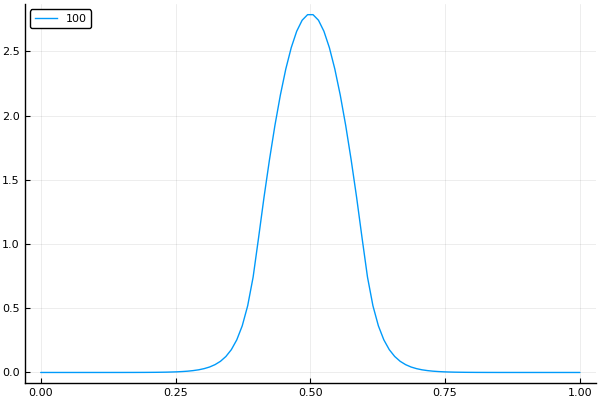

In [802]:
cross_section(y,n) = sum([f(y,i)*Z1[i,n] for i=1:K])

plot(legend=:topleft)
for i in J[end:end]
    plot!(y, cross_section.(y,i), label="$i")
end
plot!()

Невязка:
$r_n(y)=\Psi_1 C_1(\varkappa^2\rho(x_0,y)-\gamma_n^2-\mu_1^2)+\dotso+\Psi_K C_K (\varkappa^2\rho(x_0,y)-
  \gamma_n^2-\mu_K^2)$

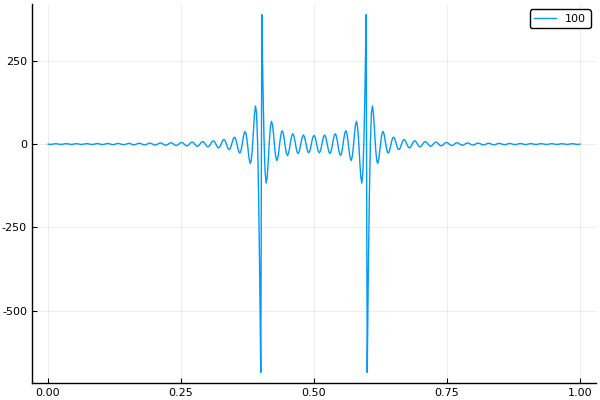

In [804]:
residual(y0,n) = sum([f(y0,i)*c[i,n]*(k^2*(z -> f1(0)<z<f4(0) ? r2 : r1)(y0)-L1[n]-mu(i)^2) for i=1:K])
plot()
for k in J[end:end]
    plot!(0:b/500:b,residual.(0:b/500:b,k),label="$k")
end
plot!()

In [512]:
sqrt.(L1[J]).-k

9-element Array{Float64,1}:
 -15.107235676730168 
 -10.85814574393785  
  -5.689901643057361 
  -4.427634493851045 
  -1.3982797400171307
  -1.0724993976855117
   3.1445972322471505
  12.410414098914757 
  17.70655830601975  

In [513]:
sqrt(L1[J[end]])

44.20655830601975

In [514]:
gamma1 = sqrt.(Complex.(L1[end-K+1:end]));

Условия излучения:  
$\begin{cases}
\left.(i\Gamma_{(1)} X+X')\right|_{x=0} = 2i\Gamma_{(1)} A, \\
\left.(i\Gamma_{(3)} X-X')\right|_{x=a} = 2i\Gamma_{(3)} B.
\end{cases}$

### Регулярная часть волновода (слева)

In [730]:
A = diagm(0=>ones(K))
B_reg = fill(-2*I - h^2*M_square + h^2*k^2*YrY(1),  N_-2)
B_reg = [[B_reg[1]/2+h*im*G1]; B_reg; [B_reg[1]/2+h*im*G1]]
C_ = diagm(0=>ones(K));

In [887]:
A_I_reg = zeros(K);  A_I_reg[K] = 1
F0_reg = 2h*im*G1*A_I_reg
F_reg = [[F0_reg]; fill(zeros(K),N_-1)];

In [888]:
X_reg = matrix_thomas(A,B_reg,C_,F_reg,typ=Complex)

direct, step: 1
direct, step: 2
direct, step: 3
direct, step: 4
direct, step: 5
direct, step: 6
direct, step: 7
direct, step: 8
direct, step: 9
direct, step: 10
direct, step: 11
direct, step: 12
direct, step: 13
direct, step: 14
direct, step: 15
direct, step: 16
direct, step: 17
direct, step: 18
direct, step: 19
direct, step: 20
direct, step: 21
direct, step: 22
direct, step: 23
direct, step: 24
direct, step: 25
direct, step: 26
direct, step: 27
direct, step: 28
direct, step: 29
direct, step: 30
direct, step: 31
direct, step: 32
direct, step: 33
direct, step: 34
direct, step: 35
direct, step: 36
direct, step: 37
direct, step: 38
direct, step: 39
direct, step: 40
direct, step: 41
direct, step: 42
direct, step: 43
direct, step: 44
direct, step: 45
direct, step: 46
direct, step: 47
direct, step: 48
direct, step: 49
direct, step: 50
direct, step: 51
direct, step: 52
direct, step: 53
direct, step: 54
direct, step: 55
direct, step: 56
direct, step: 57
direct, step: 58
direct, step: 59
direct

100×200 Array{Complex,2}:
 -5.05011e-20+2.44474e-17im  …  -5.83037e-20-1.13351e-18im
  -2.18788e-6+0.0051905im        -2.06992e-6-4.03682e-5im 
 -3.44244e-21-3.39255e-17im     -3.32782e-21-6.47636e-20im
   4.52051e-6-0.0364906im          2.3859e-6+4.65411e-5im 
   5.0049e-20+3.85478e-17im      4.41786e-20+8.5885e-19im 
  -1.27468e-5-0.0275858im    …    5.24565e-6+0.000102207im
 -6.75315e-20-9.19197e-18im     -5.85706e-20-1.13847e-18im
  -6.74127e-6+0.0124735im         1.35412e-5+0.000263971im
  4.48901e-20+5.55963e-18im      7.67914e-20+1.49361e-18im
   1.76763e-6-0.00868804im       -7.37766e-6-0.000143825im
 -3.88587e-20-5.99535e-19im  …  -6.24893e-20-1.21533e-18im
  -6.00476e-7+0.0062196im         4.88367e-6+9.52034e-5im 
  2.93626e-20+2.27764e-19im      4.69544e-20+9.13215e-19im
             ⋮               ⋱                            
 -2.41662e-20+4.50115e-19im     -2.95856e-23-5.71121e-22im
   -3.5314e-6+6.76132e-5im       8.56832e-10+1.66334e-8im 
  1.46333e-20-2.12976e-19im  …

In [889]:
u_reg = reshape([dot(f.(y_i,1:K), real.(X_reg[1:K,n])) for n=1:N_ for y_i in y], length(y), length(x));

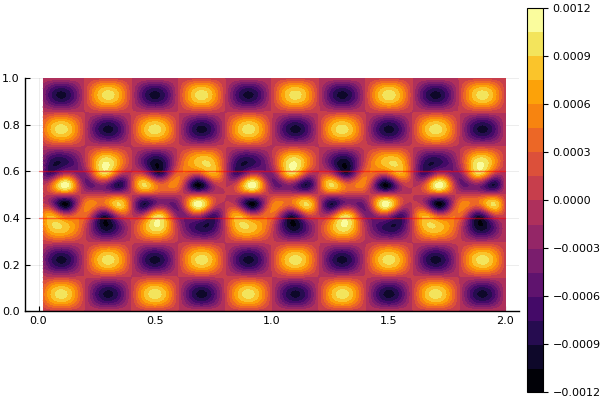

In [815]:
plot(x[3:end],y,real.(u_reg[:,3:end]),fill=true,aspect_ratio=1)
plot!(x, 0*x.+(b/2-0.1), c=:red, alpha=0.5, ylim=(0,b), aspect_ratio=1, leg=false)
plot!(x, 0*x.+(b/2+0.1), c=:red, alpha=0.5)
# savefig("reg_wg.png")

In [877]:
A_I_test = zeros(K);    A_I_test[K] = 1
nu_I = diagm(0=>(i->i-sqrt(i^2-1)).(L[end-K+1:end]))
A_test = [fill(A,N_-1); [-nu_I*Z1^-1]]
B_test = [[Z1^-1]; B_reg; [Z1^-1]]
C_test = [[-nu_I*Z1^-1]; fill(C_,N_-1)]
F_test = [[(A-nu_I.^2)*A_I_test]; fill(zeros(K),N_-1)];

In [878]:
X_test = matrix_thomas(A_test,B_test,C_test,F_test,typ=Complex)

direct, step: 1
direct, step: 2
direct, step: 3
direct, step: 4
direct, step: 5
direct, step: 6
direct, step: 7
direct, step: 8
direct, step: 9
direct, step: 10
direct, step: 11
direct, step: 12
direct, step: 13
direct, step: 14
direct, step: 15
direct, step: 16
direct, step: 17
direct, step: 18
direct, step: 19
direct, step: 20
direct, step: 21
direct, step: 22
direct, step: 23
direct, step: 24
direct, step: 25
direct, step: 26
direct, step: 27
direct, step: 28
direct, step: 29
direct, step: 30
direct, step: 31
direct, step: 32
direct, step: 33
direct, step: 34
direct, step: 35
direct, step: 36
direct, step: 37
direct, step: 38
direct, step: 39
direct, step: 40
direct, step: 41
direct, step: 42
direct, step: 43
direct, step: 44
direct, step: 45
direct, step: 46
direct, step: 47
direct, step: 48
direct, step: 49
direct, step: 50
direct, step: 51
direct, step: 52
direct, step: 53
direct, step: 54
direct, step: 55
direct, step: 56
direct, step: 57
direct, step: 58
direct, step: 59
direct

100×200 Array{Complex,2}:
   1.47536e-5+3.66877e-8im   …   -1.38219e-8-6.07553e-13im
   8.90884e-9+5.7465e-13im       -1.16697e-8-8.38139e-13im
  -4.68382e-6-1.36777e-8im       -5.15261e-9-2.33496e-13im
  -9.08304e-9-4.13247e-13im       -1.4237e-9-9.77173e-14im
  -6.13397e-8-2.48875e-8im        3.60237e-8+1.13939e-12im
  -5.11711e-9-2.46718e-13im  …   3.52279e-10+2.50082e-14im
  -7.89917e-7+7.679e-9im         -1.44625e-8-1.05248e-12im
  5.64086e-10+4.19785e-14im      1.67275e-10+1.18852e-14im
    5.0241e-7-1.69045e-8im        8.66351e-9+1.06005e-12im
 -4.94372e-10-3.19065e-14im     -7.05396e-11-5.00393e-15im
   -2.8003e-7+1.52423e-8im   …  -6.33606e-10-9.26145e-14im
  5.52134e-10+3.32947e-14im     -1.62492e-11-1.14118e-15im
   1.50407e-7-1.18455e-8im       3.49227e-10+4.47859e-14im
             ⋮               ⋱                            
   3.00419e-7-1.27617e-9im      -3.91085e-11-2.71956e-15im
  2.58821e-12+9.25582e-17im      -7.9842e-12-8.38935e-16im
  -3.90993e-7+1.03074e-8im   …

In [879]:
u_test = reshape([dot(f.(y_i,1:K), real.(X_test[1:K,n])) for n=1:N_ for y_i in y], length(y), length(x));

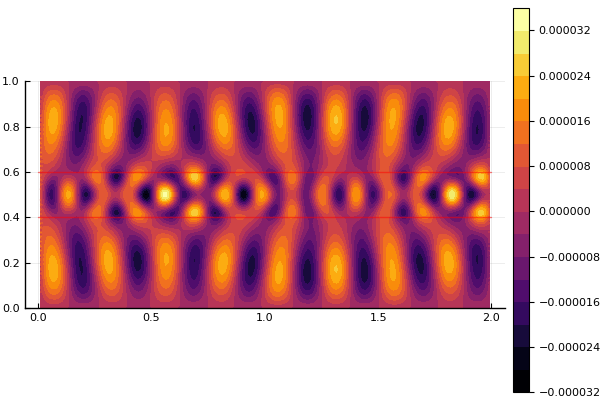

In [880]:
plot(x[2:end-1],y,real.(u_test[:,2:end-1]),fill=true,aspect_ratio=1)
plot!(x, 0*x.+(b/2-0.1), c=:red, alpha=0.5, ylim=(0,b), aspect_ratio=1, leg=false)
plot!(x, 0*x.+(b/2+0.1), c=:red, alpha=0.5)

### Расщепление волновода

In [894]:
A3 = k^2*YrY(N_,K_cross) - M_square
L3 = eigvals(A3)
Z3 = eigvecs(A3)
gamma3 = sqrt.(Complex.(L3[end-K+1:end]));

In [742]:
M_square = diagm(0=>mu.(1:K).^2)
G1 = diagm(0=>gamma1)
G3 = diagm(0=>gamma3);

In [743]:
B1 = fill(-2*I - h^2*M_square + h^2*k^2*YrY(1),  sum(x .<= a1)-1)
B2 =     [-2*I - h^2*M_square + h^2*k^2*YrY(n) for n in filter(i->(a1 .< x[i] .< a2),1:N_)]
B3 = fill(-2*I - h^2*M_square + h^2*k^2*YrY(N_), sum(a2 .<= x .<= a)-1)
B = [[B1[1]/2+h*im*G1]; B1; B2; B3; [B3[1]/2+h*im*G3]]
C_ = diagm(0=>ones(K));

In [744]:
A_I = [zeros(K-1); 1]
F0 = 2h*im*G1*A_I
F = [[F0]; fill(zeros(K),N_-1)];

In [745]:
X_in = matrix_thomas(A,B,C_,F,typ=Complex)

direct, step: 1
direct, step: 2
direct, step: 3
direct, step: 4
direct, step: 5
direct, step: 6
direct, step: 7
direct, step: 8
direct, step: 9
direct, step: 10
direct, step: 11
direct, step: 12
direct, step: 13
direct, step: 14
direct, step: 15
direct, step: 16
direct, step: 17
direct, step: 18
direct, step: 19
direct, step: 20
direct, step: 21
direct, step: 22
direct, step: 23
direct, step: 24
direct, step: 25
direct, step: 26
direct, step: 27
direct, step: 28
direct, step: 29
direct, step: 30
direct, step: 31
direct, step: 32
direct, step: 33
direct, step: 34
direct, step: 35
direct, step: 36
direct, step: 37
direct, step: 38
direct, step: 39
direct, step: 40
direct, step: 41
direct, step: 42
direct, step: 43
direct, step: 44
direct, step: 45
direct, step: 46
direct, step: 47
direct, step: 48
direct, step: 49
direct, step: 50
direct, step: 51
direct, step: 52
direct, step: 53
direct, step: 54
direct, step: 55
direct, step: 56
direct, step: 57
direct, step: 58
direct, step: 59
direct

100×200 Array{Complex,2}:
  5.61938e-22+8.23088e-18im  …  -1.08427e-21-1.47743e-20im
   -2.3759e-6+0.00105021im       -9.66638e-7-1.30862e-5im 
  2.57192e-22+8.36068e-18im     -7.73635e-22-1.05089e-20im
   3.93212e-6-0.00179674im       -8.81525e-7-1.19286e-5im 
 -2.27161e-21+1.29396e-17im     -8.02519e-22-1.03486e-20im
  -3.15433e-6+0.00190271im   …    4.06782e-7+5.51001e-6im 
 -3.89252e-22+2.51389e-17im     -1.39191e-21-1.9039e-20im 
   1.41416e-6+3.09751e-5im       -5.49751e-7-7.4401e-6im  
  1.31938e-21-3.66564e-17im      3.02708e-21+4.05827e-20im
   7.44668e-7+0.000190042im      -2.97266e-7-4.02527e-6im 
 -2.33081e-21+2.75197e-17im  …  -2.11007e-22-2.73736e-21im
  -2.84003e-6-2.54667e-5im        1.23938e-7+1.67751e-6im 
  3.54318e-21-1.96914e-17im     -9.48625e-22-1.26499e-20im
             ⋮               ⋱                            
 -4.49571e-20+5.72769e-19im     -3.00429e-24-4.08099e-23im
    8.1012e-8+1.28809e-6im      -8.08622e-10-1.09646e-8im 
 -1.84726e-20+2.39654e-19im  …

In [746]:
u = reshape([dot(f.(y_i,1:K), X_in[1:K,n]) for n=1:N_ for y_i in y], length(y), length(x));

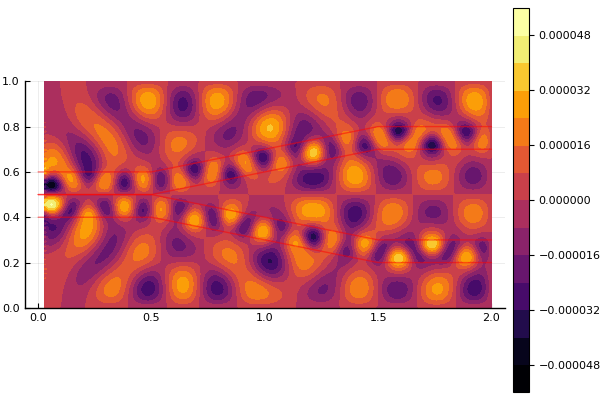

In [754]:
plot(x[4:end],y,real.(u[:,4:end]),fill=true,aspect_ratio=1)
plot!(x, f1.(x), c=:red, alpha=0.5, ylim=(0,b), aspect_ratio=1, leg=false)
plot!(x, f2.(x), c=:red, alpha=0.5)
plot!(x, f3.(x), c=:red, alpha=0.5)
plot!(x, f4.(x), c=:red, alpha=0.5)
# savefig("wg_1.png")

In [899]:
nu_I = diagm(0=>(i->i-sqrt(i^2-1)).(L1[end-K+1:end]))
nu_III = diagm(0=>(i->i-sqrt(i^2-1)).(L3[end-K+1:end]))
A_seq = [fill(A,N_-1); [-nu_III*Z3^-1]]
B_seq = [[Z1^-1]; B1; B2; B3; [Z3^-1]]
C_seq = [[-nu_I*Z1^-1]; fill(C_,N_-1)]
F_seq = [[(A-nu_I.^2)*A_I]; fill(zeros(K),N_-1)];

In [900]:
X_seq = matrix_thomas(A_seq,B_seq,C_seq,F_seq,typ=Complex)

direct, step: 1
direct, step: 2
direct, step: 3
direct, step: 4
direct, step: 5
direct, step: 6
direct, step: 7
direct, step: 8
direct, step: 9
direct, step: 10
direct, step: 11
direct, step: 12
direct, step: 13
direct, step: 14
direct, step: 15
direct, step: 16
direct, step: 17
direct, step: 18
direct, step: 19
direct, step: 20
direct, step: 21
direct, step: 22
direct, step: 23
direct, step: 24
direct, step: 25
direct, step: 26
direct, step: 27
direct, step: 28
direct, step: 29
direct, step: 30
direct, step: 31
direct, step: 32
direct, step: 33
direct, step: 34
direct, step: 35
direct, step: 36
direct, step: 37
direct, step: 38
direct, step: 39
direct, step: 40
direct, step: 41
direct, step: 42
direct, step: 43
direct, step: 44
direct, step: 45
direct, step: 46
direct, step: 47
direct, step: 48
direct, step: 49
direct, step: 50
direct, step: 51
direct, step: 52
direct, step: 53
direct, step: 54
direct, step: 55
direct, step: 56
direct, step: 57
direct, step: 58
direct, step: 59
direct

100×200 Array{Complex,2}:
   1.33159e-5+0.0im    5.10292e-6+0.0im  …  -1.65923e-13+0.0im
  1.07074e-20+0.0im    1.1666e-20+0.0im      5.96098e-23+0.0im
   -6.6309e-6+0.0im    -3.3276e-7+0.0im     -1.82594e-13+0.0im
 -5.19635e-20+0.0im   4.01486e-21+0.0im      3.90956e-24+0.0im
   5.06441e-7+0.0im   -1.58461e-7+0.0im      1.43467e-13+0.0im
  6.36075e-20+0.0im  -9.25038e-22+0.0im  …   1.21089e-23+0.0im
  -2.13871e-6+0.0im   -8.25014e-8+0.0im      1.28124e-13+0.0im
 -3.75289e-20+0.0im  -7.54684e-22+0.0im     -4.39308e-24+0.0im
   -1.1018e-6+0.0im    3.62456e-8+0.0im      5.60251e-14+0.0im
  2.65525e-20+0.0im  -1.64423e-25+0.0im     -9.56773e-23+0.0im
   1.32146e-6+0.0im   -6.93141e-9+0.0im  …   3.15661e-13+0.0im
 -1.49016e-20+0.0im   9.65171e-26+0.0im      2.57394e-24+0.0im
  -1.23021e-6+0.0im   -9.71871e-9+0.0im      2.39552e-14+0.0im
             ⋮                           ⋱                    
   1.27794e-6+0.0im    1.81229e-7+0.0im      2.36685e-16+0.0im
 -2.73378e-21+0.0im   5.09084

In [901]:
u_seq = reshape([dot(f.(y_i,1:K), X_seq[1:K,n]) for n=1:N_ for y_i in y], length(y), length(x));

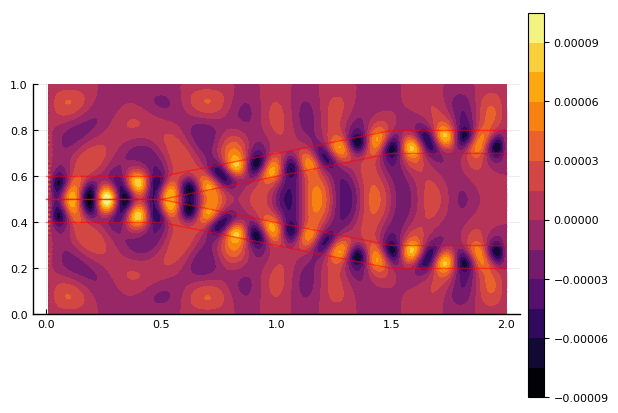

In [907]:
plot(x[2:end],y,real.(u_seq[:,2:end]),fill=true,aspect_ratio=1)
plot!(x, f1.(x), c=:red, alpha=0.5, ylim=(0,b), aspect_ratio=1, leg=false)
plot!(x, f2.(x), c=:red, alpha=0.5)
plot!(x, f3.(x), c=:red, alpha=0.5)
plot!(x, f4.(x), c=:red, alpha=0.5)
savefig("wg_seq.png")